# Investointilaskelmien perusfunktioita Pythonilla

Rahoituslaskentaan on Excelissä hyvät funktiot. Vastaavanlaisia funktioita voi käyttää myös Pythonissa.

Tässä esimerkissä tutustutaan tällaisten funktioiden käyttöön erityisesti investointilaskujen näkökulmasta.

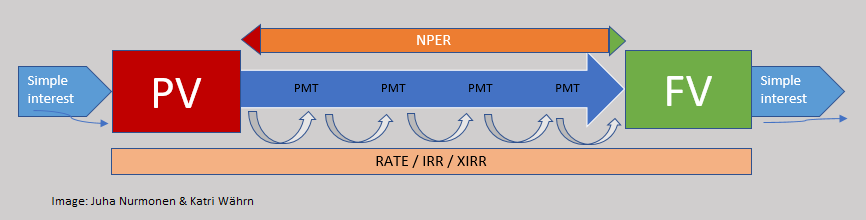

Oleellista on muistaa, että rahalla on aika-arvo ja vain samanaikaisia rahoja (korkovaikutus laskettu samaan ajankohtaan) saa laskea yhteen, vähentää, vertailla.

Jos tarkasteltavat rahat eivät ole samassa ajankohdassa, ne tulee sellaiseen siirtää. Tässä tullaan tärkeään **nykyarvo**n käsitteeseen.

In [42]:
### Tuodaan peruskirjastot

import pandas as pd
import numpy as np

# Numeromuotoiluja varten

float_formatter = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind':float_formatter})

Tarkistetaan seuraavaksi numpy-kirjaston versio. Sen versiosta 1.15 lähtien rahoitusfunktiot ovat olleet omassa kirjastossan numpy-financial.

In [43]:
print(np.__version__)

1.23.5


In [44]:
!pip install numpy-financial

In [51]:
import numpy_financial as npf

Investointilaskelmat ovat rahoituslaskelman perusmenetelmiä. Asiasta löytyy lisätietoa mistä tahansa alan peruskirjallisuudesta. Eräs kooste käytettävistä laskentamenetelmistä löytyy [slideshare-palvelusta](https://www.slideshare.net/juhanurmonen/investointilaskelmat-123566310)


* nykyarvomenetelmä
* sisäisen korkokannan menetelmä
*annuiteettimenetelmä

Tutustutaan seuraavaksi näihin laskentatapoihin esimerkkien avulla, tässä tapauksessa Pythonia ja numpya hyödyntäen.

## Nykyarvomenetelmä

Nykyarvomenetelmässä lasketaan tulevien tuottojen tai kustannussäästöjen nykyarvo ja sitä verrataan investointikustannuksiin.

**Esimerkki**

Yritykseen hankittava atk-laitteisto maksaisi 420 000 € .Sitä voitaisiin käyttää 3 vuotta, jonka jälkeen  se on myytävissä hintaan 150 000 €. Laitteistolla saavutetaan ensimmäisenä vuonna 80 000 euron, toisena vuonna 120 000 €:n ja kolmantena vuonna 130 000 €:n kustannussäästö.

Tuottaako laitteistoon sijoitettu raha 10 % vuodessa ?

In [47]:
saastot = np.array([80000, 120000, 130000+150000])
korko = 0.1
hankintahinta = 420000

nykyarvo_saastot = npf.npv(korko, saastot)

nykyarvo_saastot

420495.867768595

In [48]:
### Tulostetaan vielä vastaus

if nykyarvo_saastot <= hankintahinta :
  print(f'Investointi ei kannata, säästöjen nykyarvo ei ylitä hankintahintaa, jos tavoitetuotto on', korko*100, ' %.')
else : print(f'Investointi kannattaa, säästöjen nykyarvo ylittää hankintahinnan', nykyarvo_saastot-hankintahinta, 'eurolla.')

Investointi kannattaa, säästöjen nykyarvo ylittää hankintahinnan 495.86776859499514 eurolla.


**Esimerkki.** _Nykyarvo_

Investoinnin hankintahinta on  500 000 € ja se tuottaa nettotuottoa vuoden kuluttua 150 000 €. Tämän jälkeen nettotuottojen arvioidaan kasvavan vuosittain 5 prosentilla. Investointiajan arvioidaan olevan 5 vuotta ja jäännösarvo on 10 000 €.

a) Määritä investoinnin nettonykyarvo, kun laskentakorkokanta on 15 %.

b) Tee herkkyysanalyysi muuttaen laskentakorkokantaa ja nettotuottojen  vuosittaista kasvuodotusta.


In [53]:
### Määritellään laskentamalli

hankintahinta_nykyarvo = 5000000 # valuuttaa
jaannosarvo_nykyarvo = 10000 # valuuttaa
vuotuinen_kasvu_nykyarvo = 0.05 # prosenttia desimaalilukuna
investointiaika_nykyarvo = 5 # vuotta
laskentakorko_nykyarvo = .15 # prosenttia desimaalilukuna


In [54]:
### Lasketaan vuotuiset tuotot

tuotto_1v_nykyarvo = (1+vuotuinen_kasvu_nykyarvo)*hankintahinta_nykyarvo
tuotto_2v_nykyarvo = (1+vuotuinen_kasvu_nykyarvo)*tuotto_1v_nykyarvo
tuotto_3v_nykyarvo = (1+vuotuinen_kasvu_nykyarvo)*tuotto_2v_nykyarvo
tuotto_4v_nykyarvo = (1+vuotuinen_kasvu_nykyarvo)*tuotto_3v_nykyarvo
tuotto_5v_nykyarvo = (1+vuotuinen_kasvu_nykyarvo)*tuotto_4v_nykyarvo+jaannosarvo_nykyarvo

### Määritellään laskentamalli

def nettonykyarvo_malli(laskentakorko_nykyarvo, vuotuinen_kasvu_nykyarvo):
  return npf.npv(laskentakorko_nykyarvo, [tuotto_1v_nykyarvo, tuotto_2v_nykyarvo, tuotto_3v_nykyarvo, tuotto_4v_nykyarvo, tuotto_5v_nykyarvo])

In [58]:
y = nettonykyarvo_malli(laskentakorko_nykyarvo, vuotuinen_kasvu_nykyarvo)
y

22070515.935834996

In [56]:
!pip install sensitivity

In [60]:
from sensitivity import SensitivityAnalyzer

sensitivity_dict = {
    'vuotuinen_kasvu_nykyarvo' : [-.2, -.15, -.1, -.05, .0, .05, .1, .15, .2, .25, .3],
    'laskentakorko_nykyarvo' : [.03, .05, .7, .11, .13, .15, .17, .19, .21, .23]
}

sa = SensitivityAnalyzer(sensitivity_dict, nettonykyarvo_malli)

100%|██████████| 110/110 [00:00<00:00, 936.19it/s]


In [61]:
sa.df

,vuotuinen_kasvu_nykyarvo,laskentakorko_nykyarvo,Result
0,-0.2,0.03,27298289.786377
1,-0.2,0.05,26258227.024748
2,-0.2,0.7,12497734.664037
3,-0.2,0.11,23568045.07671
4,-0.2,0.13,22793273.607477
...,...,...,...
105,0.3,0.15,22070515.935835
106,0.3,0.17,21395248.864792
107,0.3,0.19,20763421.691884
108,0.3,0.21,20171399.244475


,0.030000,0.050000,0.110000,0.130000,0.150000,0.170000,0.190000,0.210000,0.230000,0.700000
vuotuinen_kasvu_nykyarvo,,,,,,,,,,
-0.200000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
-0.150000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
-0.100000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
-0.050000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
0.000000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
0.050000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
0.100000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
0.150000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"
0.200000,"27,298,290 €","26,258,227 €","23,568,045 €","22,793,274 €","22,070,516 €","21,395,249 €","20,763,422 €","20,171,399 €","19,615,913 €","12,497,735 €"


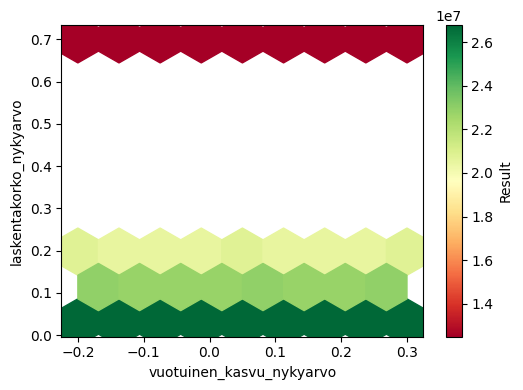

In [63]:
plot = sa.plot()

styled = sa.styled_dfs(num_fmt='{:,.0f} €')

## Sisäinen korkokanta

Sisäisen korkokannan menetelmässä lasketaan tulevien tuottojen tai kustannussäästöjen ns. sisäinen korkokanta ja sitä verrataan vuotuiseen tavoitetuottoon.

**Esimerkki**. _Sisäinen korkokanta_

Yrittäjä harkitsee Kallion Pesula Oy:n perustamista. Pesulan perusinvestointi on 380 000 €. Lisäksi pesulan arvellaan tuottavan vuosittain nettona siten, että ensimmäisen vuoden nettotuotto on 100 000 €, toisen ja kolmannen vuoden 120 000 € ja neljännen vuoden 100 000 €. Jäännösarvo neljän vuoden kuluttua arvioidaan 50 000 €:ksi.

a) Määritä investoinnin sisäinen korkokanta.

b) Päättele a-kohdan tuloksesta, onko investointi kannattava, jos se toteutetaan lainalla, jonka korkokanta on 8 %.

c) Päättele a-kohdan tuloksesta, onko investointi kannattava, jos sille halutaan 12 %:n vuotuinen tuotto.


In [64]:
Kallion_Pesula_investointikustannus = 380000 # euroa
Kallion_Pesula_tuotto_1v = 100000 # euroa
Kallion_Pesula_tuotto_2v = 120000 # euroa
Kallion_Pesula_tuotto_3v = 120000 # euroa
Kallion_Pesula_tuotto_4v = 100000 # euroa
Kallion_Pesula_jaannosarvo = 50000 #uroa


In [65]:
### Lasketaan sisäinen korkokanta irr-funktiolla

x = np.array([-Kallion_Pesula_investointikustannus, Kallion_Pesula_tuotto_1v, Kallion_Pesula_tuotto_2v, Kallion_Pesula_tuotto_3v, Kallion_Pesula_tuotto_4v + Kallion_Pesula_jaannosarvo])
Kallion_Pesula_sisainen_korko = npf.irr(x)
print('Investoinnin sisäinen korkokanta on',Kallion_Pesula_sisainen_korko * 100,' %')

Investoinnin sisäinen korkokanta on 10.307194201714399  %


Pyydetään käyttäjältä lainan korkokanta ja verrataan sitä sisäiseen korkoon.

In [69]:
print('Anna korkokanta prosenttilukuna ilman prosenttimerkkiä: ')
lainakorko = input(prompt =' ')

Anna korkokanta prosenttilukuna ilman prosenttimerkkiä: 
 12.7


In [71]:
if (float(lainakorko)/100) < Kallion_Pesula_sisainen_korko :
  print('Jos lainan korkokanta on', lainakorko, '%, investointi on kannattava, sillä investoinnin sisäinen korkokanta on ', float_formatter(Kallion_Pesula_sisainen_korko*100), ' %')
else : print('Jos lainan korkokanta on', lainakorko, 'investointi ei ole kannattava, sillä investoinnin sisäinen korkokanta on ', float_formatter(Kallion_Pesula_sisainen_korko*100),' %')

Jos lainan korkokanta on 12.7 investointi ei ole kannattava, sillä investoinnin sisäinen korkokanta on  10.31  %


**Esimerkki**

Investoinnin B perushankintakustannus on 187 000 € ja vuotuinen nettotuotto 45 000 €. Määritetään investoinnin sisäinen korkokanta, kun jäännösarvo on
10 000 € ja investointiaika on 6 vuotta.

Tässä vuotuinen nettotuotto on joka vuosi sama. Ratkaistaan sisäinen korkokanta kahdella tavalla, _rate_ ja _irr_-funkioilla.

In [72]:
InvestointiB_investointikustannus = 187000 # euroa
InvestointiB_vuotuinen_tuotto = 45000 # euroa
InvestointiB_jaannosarvo = 10000 #uroa
InvestointiB_aika = 6 # vuotta


Käyttäen *irr*-funktiota, investoinnin sisäinen korkokanta selviää vastaavaan tapaan kuin edellä.

In [75]:
### Lasketaan sisäinen korkokanta irr-funktiolla

x_B = np.array([-InvestointiB_investointikustannus, InvestointiB_vuotuinen_tuotto, InvestointiB_vuotuinen_tuotto, InvestointiB_vuotuinen_tuotto, InvestointiB_vuotuinen_tuotto, InvestointiB_vuotuinen_tuotto, InvestointiB_vuotuinen_tuotto + InvestointiB_jaannosarvo])
InvestointiB_sisainen_korko = npf.irr(x_B)
print('Investoinnin B sisäinen korkokanta on', float_formatter(InvestointiB_sisainen_korko * 100),' %')

Investoinnin B sisäinen korkokanta on 12.57  %


Koska vuotuiset tuotot ovat samansuuruiset, myös _rate_-funktiota on nyt näppärä soveltaa.

In [80]:
### Lasketaan sisäinen korkokanta rate-funktiolla

InvestointiB_sisainen_korko2 = npf.rate(InvestointiB_aika, InvestointiB_vuotuinen_tuotto, -InvestointiB_investointikustannus, InvestointiB_jaannosarvo)

print('Investoinnin B sisäinen korkokanta on', float_formatter(InvestointiB_sisainen_korko2 * 100),' %')

Investoinnin B sisäinen korkokanta on 12.57  %


**Esimerkki**. *Sisäinen korkokanta ja herkkyysanalyysiä*


Ravintolatoimintaa harjoittava yritys aikoo korottaa ravintolan tasoa tekemällä ravintolatilojen peruskorjauksen. Korjaus maksaisi erään urakkatarjouksen mukaan  750 000 €.  Ensimmäisen vuoden jälkeen nettotuoton arvellaan olevan 200 000 € ja seuraavina vuosina aina 5 % suurempi. Jäännösarvo on nolla euroa.

a) Laske investoinnin sisäinen korkokanta, kun investointiaika on 6 vuotta.

b) Tee herkkyysanalyysiä muuttamalla nettotuottojen muutosprosenttia ja urakkatarjouksen määrää.


Seurataan tässä aiempaa esimerkkiä nykyarvojen herkkyysanalyysista.

In [85]:
### Määritellään laskentamalli

investointikustannus_ravintola = 750000 # valuuttaa
jaannosarvo_ravintola = 0 # valuuttaa
tuoton_kasvu_aluksi = 200000 # euroa
vuotuinen_kasvu_ravintola = 0.05 # prosenttia desimaalilukuna
investointiaika_ravintola = 6 # vuotta

In [86]:
### Lasketaan kassavirta

tuotto_1v_ravintola = tuoton_kasvu_aluksi
tuotto_2v_ravintola = (1+vuotuinen_kasvu_ravintola)*tuotto_1v_ravintola
tuotto_3v_ravintola = (1+vuotuinen_kasvu_ravintola)*tuotto_2v_ravintola
tuotto_4v_ravintola = (1+vuotuinen_kasvu_ravintola)*tuotto_3v_ravintola
tuotto_5v_ravintola = (1+vuotuinen_kasvu_ravintola)*tuotto_4v_ravintola
tuotto_6v_ravintola = (1+vuotuinen_kasvu_ravintola)*tuotto_5v_ravintola+jaannosarvo_ravintola

### Määritellään laskentamalli

def sisainen_korko_ravintola_malli(investointikustannus_ravintola, vuotuinen_kasvu_ravintola):
  x_ravintola = np.array([-investointikustannus_ravintola, tuotto_1v_ravintola, tuotto_2v_ravintola, tuotto_3v_ravintola, tuotto_4v_ravintola, tuotto_5v_ravintola, tuotto_6v_ravintola])
  return npf.irr(x_ravintola)

In [98]:
y_ravintola = sisainen_korko_ravintola_malli(investointikustannus_ravintola, vuotuinen_kasvu_ravintola)
print(float_formatter(y_ravintola*100), ' %')

19.22  %


In [88]:
sensitivity_dict_ravintola = {
    'vuotuinen_kasvu_ravintola' : [-.2, -.15, -.1, -.05, .0, .05, .1, .15, .2, .25, .3],
    'investointikustannus_ravintola' : [500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000]
}

sa_ravintola = SensitivityAnalyzer(sensitivity_dict_ravintola, sisainen_korko_ravintola_malli)

100%|██████████| 121/121 [00:00<00:00, 903.01it/s]


In [89]:
sa_ravintola.df

,vuotuinen_kasvu_ravintola,investointikustannus_ravintola,Result
0,-0.2,500000,0.368333
1,-0.2,550000,0.322594
2,-0.2,600000,0.283343
3,-0.2,650000,0.249168
4,-0.2,700000,0.21905
...,...,...,...
116,0.3,800000,0.168146
117,0.3,850000,0.146346
118,0.3,900000,0.126485
119,0.3,950000,0.108283


,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000
vuotuinen_kasvu_ravintola,,,,,,,,,,,
-0.200000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
-0.150000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
-0.100000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
-0.050000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
0.000000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
0.050000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
0.100000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
0.150000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915
0.200000,0.3683,0.3226,0.2833,0.2492,0.2190,0.1922,0.1681,0.1463,0.1265,0.1083,0.0915


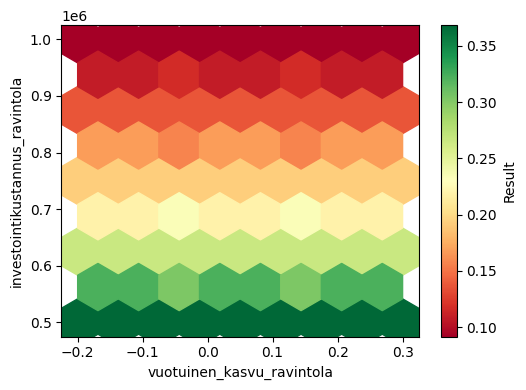

In [94]:
plot = sa_ravintola.plot()

styled = sa_ravintola.styled_dfs(num_fmt='{:.4f}')

## Annuiteettimenetelmä

Annuiteettimenetelmässä tulot ja menot muutetaan vuotuisiksi korko huomioiden. Ne ns. annualisoidaan.

**Esimerkki**

Yritys vertailee investointeja kahteen erilaiseen koneeseen.  

Kuinka suuret vuotuiset nettotuotot/kustannussäästöt olisi laitteesta saatava aikaan  (voidaan olettaa, että tuotot saadaan kunkin vuoden lopussa), jos yrityksen tuottovaatimus tällaisille investoinneille on  14 % p.a.?

Ensimmäisen koneen hinta on 200 000 euroa  ja oletetaan, että laitteen jäännösarvo on 15 000 € neljän vuoden pituiseksi arvioidun investointikauden jälkeen.

Toisen koneen hinta taas on 500 000 € eikä sillä uskota olevan arvoa 7 vuoden mittaiseksi arvioidun investointikauden päätteeksi.


In [100]:
laskentakorko_koneet = 0.14 # vuotuinen tuottovaatimus

investointikustannus_kone1 = 200000 # euroa
investointiaika_kone1 = 4 # investoinnin kesto vuosina
jaannosarvo_kone1 = 15000 # jäännösarvo euroina

investointikustannus_kone2 = 500000 # euroa
investointiaika_kone2 = 7 # investoinnin kesto vuosina
jaannosarvo_kone2 = 0 # jäännösarvo euroina

Muutetaan esimerkin tuoto ja kustannukset vuotuisiksi annuiteeteiksi.

In [104]:
pmt_kone1 = npf.pmt(laskentakorko_koneet, investointiaika_kone1, -investointikustannus_kone1, jaannosarvo_kone1)

pmt_kone2 = npf.pmt(laskentakorko_koneet, investointiaika_kone2, -investointikustannus_kone2, jaannosarvo_kone2)

print('Ensimmäisen koneen vuotuisten nettotuottojen tulisi olla ', float_formatter(pmt_kone1),' euroa.')
print('Toisen koneen vuotuisten nettotuottojen tulisi olla ', float_formatter(pmt_kone2),' euroa.')

Ensimmäisen koneen vuotuisten nettotuottojen tulisi olla  65592.88  euroa.
Toisen koneen vuotuisten nettotuottojen tulisi olla  116596.19  euroa.


In [105]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2024-02-07 18:57 by Juha Nurmonen
